In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Clustering Clean Ads_Data-2.xlsx')

In [ ]:
df.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [ ]:
df.shape

(23066, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
import numpy as np

In [ ]:
df_numeric = df.select_dtypes(include=[np.float64,np.int64])

In [ ]:
df.InventoryType.value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [ ]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [ ]:
df['Ad Type'].value_counts(),df['Format'].value_counts()

(Inter224    1658
 Inter217    1655
 Inter223    1654
 Inter219    1650
 Inter221    1650
 Inter222    1649
 Inter229    1648
 Inter227    1647
 Inter218    1645
 inter230    1644
 Inter220    1644
 Inter225    1643
 Inter226    1640
 Inter228    1639
 Name: Ad Type, dtype: int64, Video      11552
 Display    11514
 Name: Format, dtype: int64)

In [ ]:
df['Device Type'].value_counts()

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

In [ ]:
df.Platform.value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [ ]:
df.Format.value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
def CTR_recalculated(x):

    clicks=df.Clicks
    impressions=df.Impressions
    x = (clicks/impressions)*100
    return x

In [ ]:
def CPM_recalculated(x):

    spend=df.Spend
    impressions=df.Impressions
    y = (spend/impressions)*1000
    return y

In [ ]:

def CPC_recalculated(x):

    spend=df.Spend
    clicks=df.Clicks
    z = (spend/clicks)
    return z

In [ ]:
df['CTR']= df[['CTR']].apply(lambda x: CTR_recalculated(x))

In [ ]:
df['CPM']= df[['CPM']].apply(lambda x: CPM_recalculated(x))

In [ ]:
df['CPC']= df[['CPC']].apply(lambda x: CPC_recalculated(x))

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
df._get_value(102,'CPM')

0.02617801047120419

In [ ]:
df.iloc[103]

Timestamp                2020-9-16-11
InventoryType                 Format1
Ad - Length                       300
Ad- Width                         250
Ad Size                         75000
Ad Type                      Inter226
Platform                          Web
Device Type                    Mobile
Format                        Display
Available_Impressions            1173
Matched_Queries                   254
Impressions                       253
Clicks                              1
Spend                            0.01
Fee                              0.35
Revenue                          0.01
CTR                          0.395257
CPM                          0.039526
CPC                              0.01
Name: 103, dtype: object

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')


    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


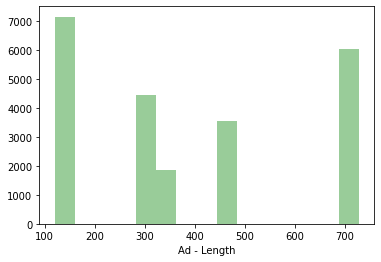

BoxPlot of Ad - Length
----------------------------------------------------------------------------


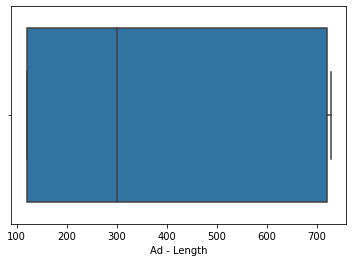

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


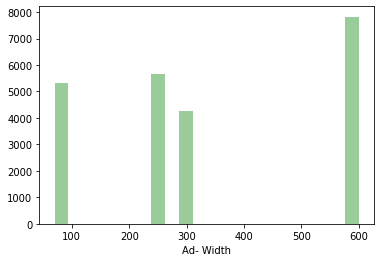

BoxPlot of Ad- Width
----------------------------------------------------------------------------


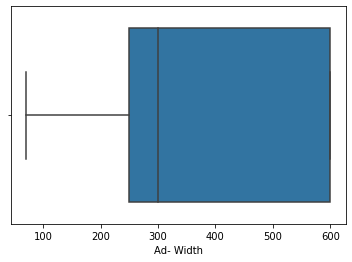

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


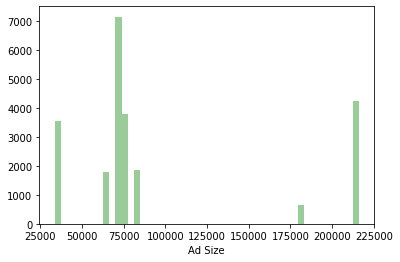

BoxPlot of Ad Size
----------------------------------------------------------------------------


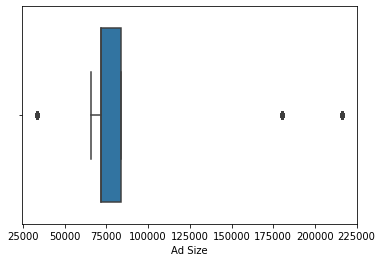

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


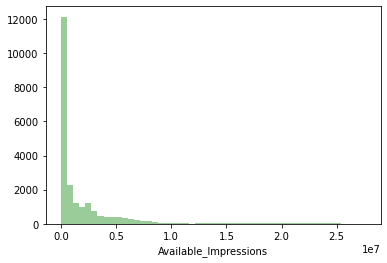

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


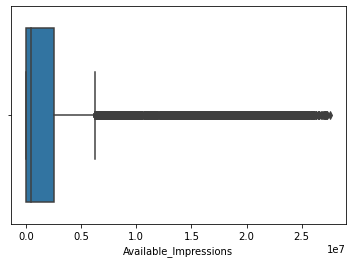

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


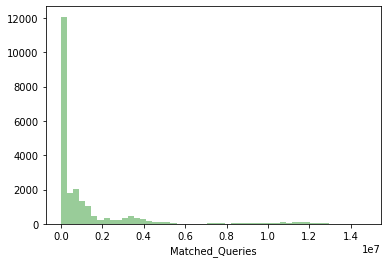

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


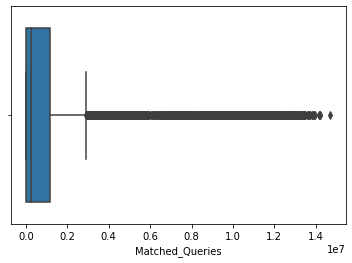

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


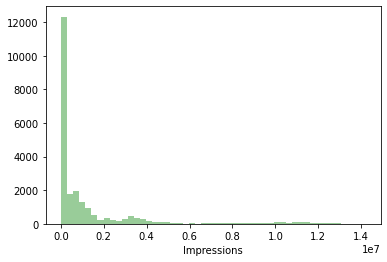

BoxPlot of Impressions
----------------------------------------------------------------------------


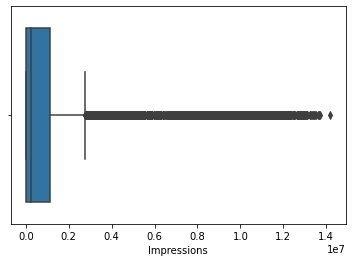

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


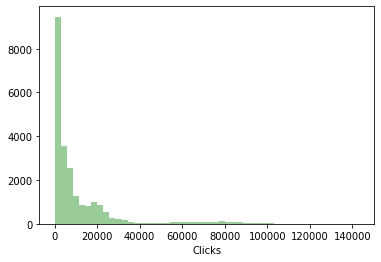

BoxPlot of Clicks
----------------------------------------------------------------------------


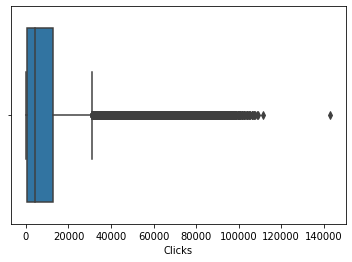

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


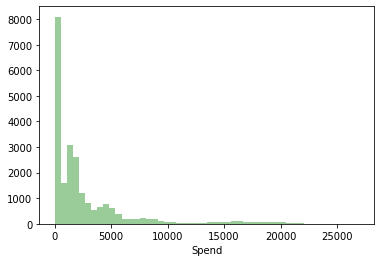

BoxPlot of Spend
----------------------------------------------------------------------------


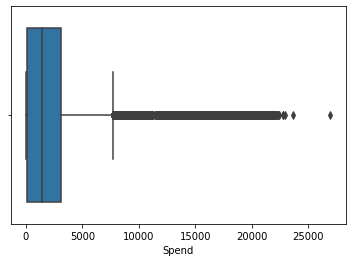

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


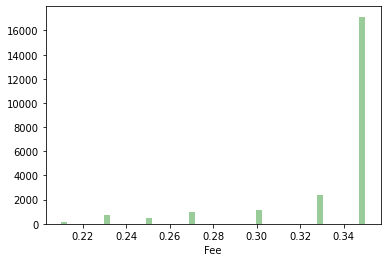

BoxPlot of Fee
----------------------------------------------------------------------------


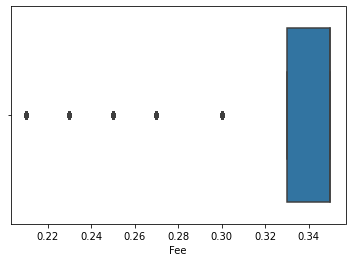

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


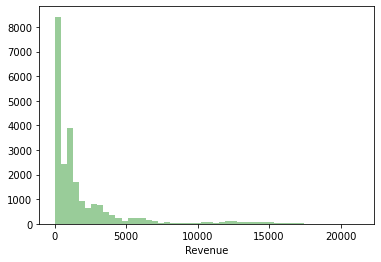

BoxPlot of Revenue
----------------------------------------------------------------------------


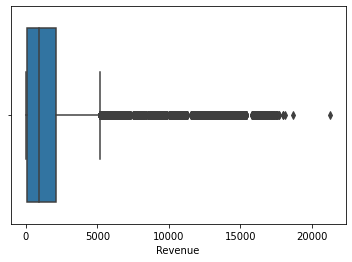

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


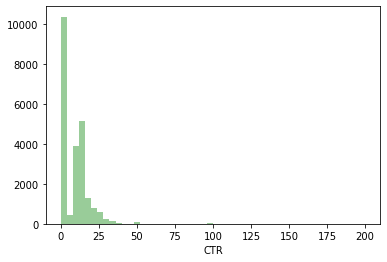

BoxPlot of CTR
----------------------------------------------------------------------------


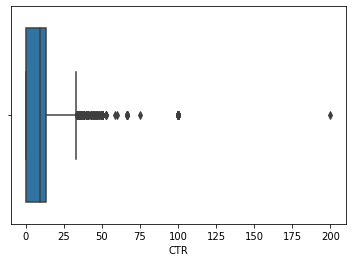

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


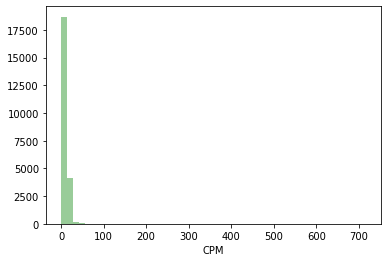

BoxPlot of CPM
----------------------------------------------------------------------------


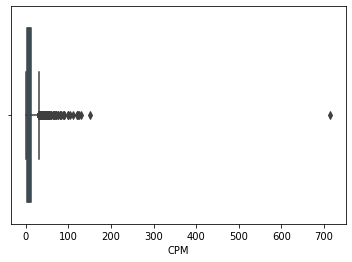

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


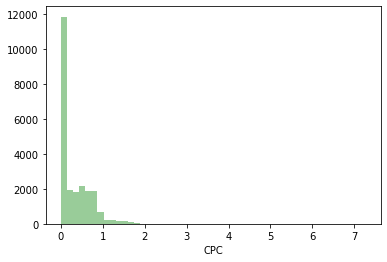

BoxPlot of CPC
----------------------------------------------------------------------------


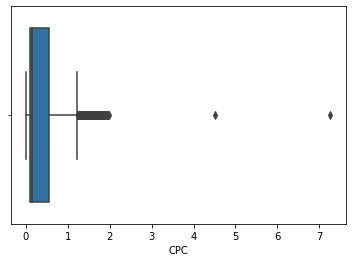

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

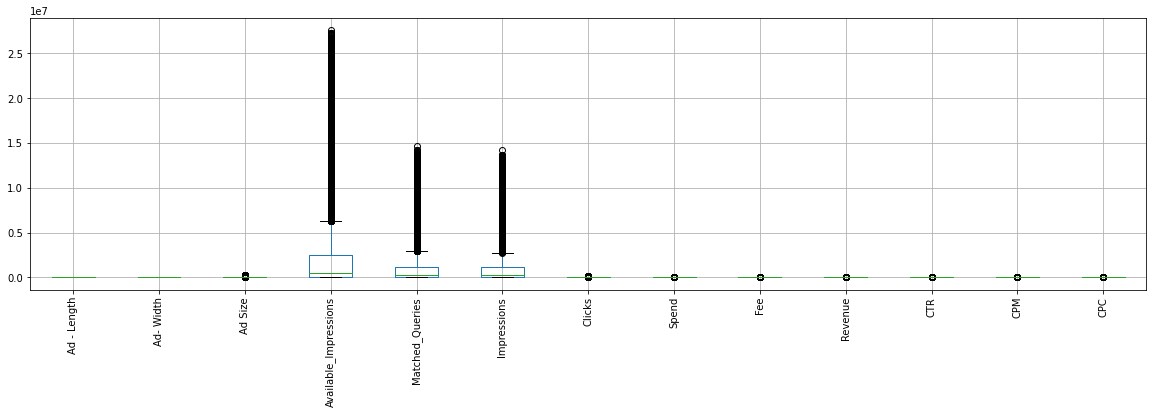

In [ ]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns


Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [ ]:
no_outlier = ['Ad - Length','Ad- Width']

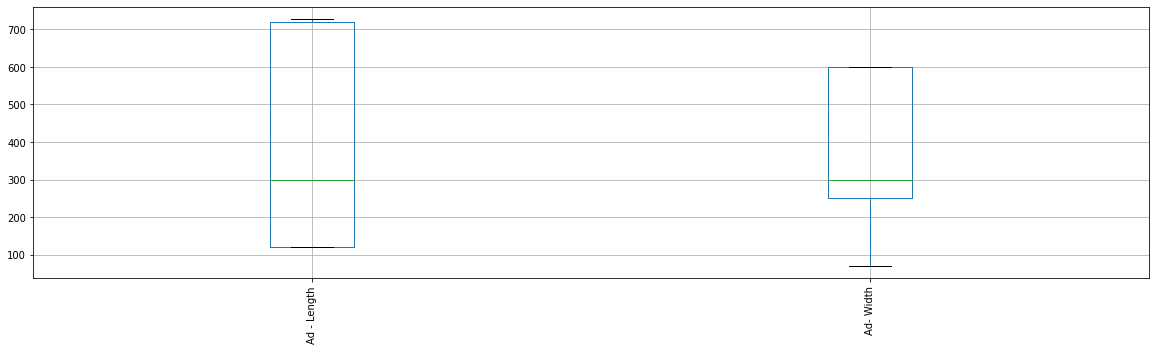

In [ ]:
df_num[no_outlier].boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,10)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,90)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [ ]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [ ]:
for i in df_num[outlier_list]:
    df_num[i]=treat_outlier(df_num[i])

<ipython-input-35-a8724f2eb622>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i]=treat_outlier(df_num[i])


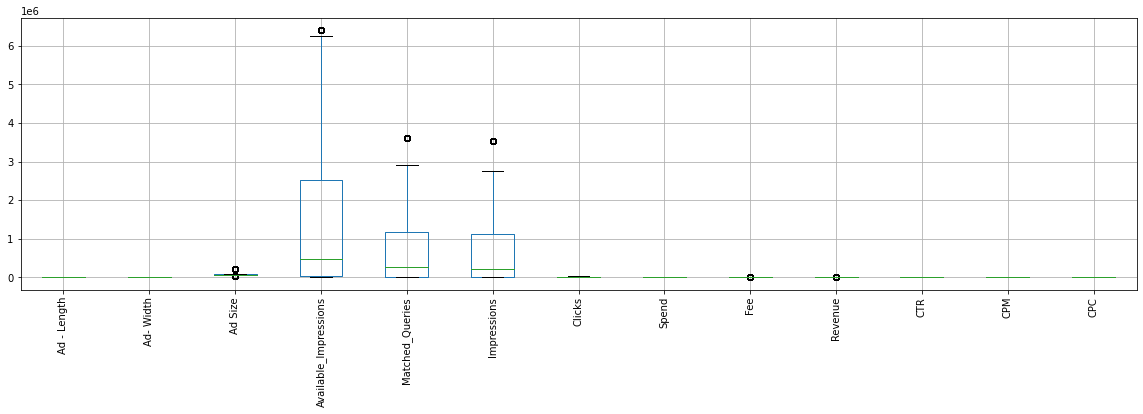

In [ ]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.359227,-0.751005,-0.726531,-0.710672,-0.915008,-0.915611,0.500873,-0.878314,-0.983732,-1.224083,-1.093037
1,-0.364496,-0.432797,-0.359227,-0.751017,-0.726563,-0.710703,-0.915008,-0.915611,0.500873,-0.878314,-0.978484,-1.224083,-1.093037
2,-0.364496,-0.432797,-0.359227,-0.750578,-0.726506,-0.710645,-0.915008,-0.915611,0.500873,-0.878314,-0.987280,-1.224083,-1.093037
3,-0.364496,-0.432797,-0.359227,-0.750716,-0.726391,-0.710530,-0.915008,-0.915611,0.500873,-0.878314,-0.997408,-1.224083,-1.093037
4,-0.364496,-0.432797,-0.359227,-0.751278,-0.726598,-0.710738,-0.915008,-0.915611,0.500873,-0.878314,-0.970558,-1.224083,-1.093037


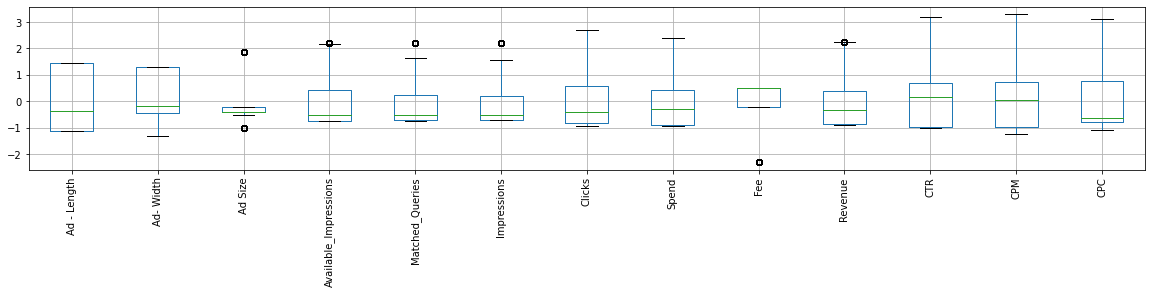

In [ ]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
import time

start = time.time()

wardlink = linkage(df_num_scaled, method = 'ward')

end = time.time()
print(end - start)

34.58887982368469


In [ ]:
import time

start = time.time()

wardlink1 = linkage(df_num, method = 'ward')

end = time.time()
print(end - start)

28.03858184814453


In [ ]:
labelList = np.array(df['Ad Type'])
labelList

array(['Inter222', 'Inter227', 'Inter222', ..., 'Inter218', 'inter230',
       'Inter221'], dtype=object)

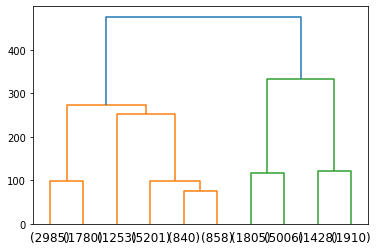

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                labels = labelList
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(wardlink,5, criterion='maxclust')
clusters

array([4, 4, 4, ..., 1, 3, 1], dtype=int32)

In [ ]:
df['clusters'] = clusters

In [ ]:
df.clusters.value_counts()

3    6899
4    6811
1    4765
5    3338
2    1253
Name: clusters, dtype: int64

In [ ]:
q=df.groupby('clusters').mean()

In [ ]:
q

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
clusters,,,,,,,,,,,,,
1,674.518363,332.486884,212101.573977,3.009302e+05,1.603219e+05,1.398654e+05,13193.965163,1196.505681,0.349496,779.437411,13.488182,11.856050,0.112954
2,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,15.215559,0.110390
3,146.863024,556.471952,73492.390201,6.217201e+04,3.864615e+04,2.971179e+04,4106.438759,430.959377,0.349162,283.530730,15.814308,14.614285,0.101779
4,419.310527,148.119219,53766.219351,2.064921e+06,1.014312e+06,9.747896e+05,3466.709000,1745.126111,0.347269,1144.464356,0.387131,1.785053,0.568884
5,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672


In [ ]:

q.reset_index(level=0, inplace=True)
q


,clusters,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,1,674.518363,332.486884,212101.573977,3.009302e+05,1.603219e+05,1.398654e+05,13193.965163,1196.505681,0.349496,779.437411,13.488182,11.856050,0.112954
1,2,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,15.215559,0.110390
2,3,146.863024,556.471952,73492.390201,6.217201e+04,3.864615e+04,2.971179e+04,4106.438759,430.959377,0.349162,283.530730,15.814308,14.614285,0.101779
3,4,419.310527,148.119219,53766.219351,2.064921e+06,1.014312e+06,9.747896e+05,3466.709000,1745.126111,0.347269,1144.464356,0.387131,1.785053,0.568884
4,5,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672


In [ ]:
q['clusters'] = q['clusters'].astype('category')

In [ ]:
q['Revenue/Spend']=q['Revenue']/q['Spend']

In [ ]:
q

,clusters,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Revenue/Spend
0,1,674.518363,332.486884,212101.573977,3.009302e+05,1.603219e+05,1.398654e+05,13193.965163,1196.505681,0.349496,779.437411,13.488182,11.856050,0.112954,0.651428
1,2,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,15.215559,0.110390,0.723596
2,3,146.863024,556.471952,73492.390201,6.217201e+04,3.864615e+04,2.971179e+04,4106.438759,430.959377,0.349162,283.530730,15.814308,14.614285,0.101779,0.657906
3,4,419.310527,148.119219,53766.219351,2.064921e+06,1.014312e+06,9.747896e+05,3466.709000,1745.126111,0.347269,1144.464356,0.387131,1.785053,0.568884,0.655806
4,5,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672,0.742874


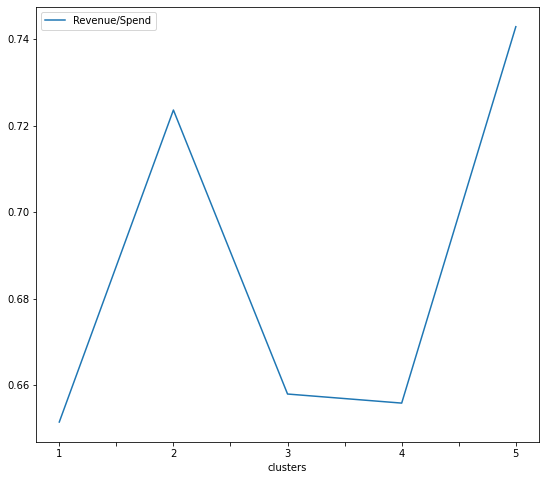

In [ ]:
q.plot(x="clusters", y=["Revenue/Spend"], kind="line", figsize=(9, 8))

# print bar gr

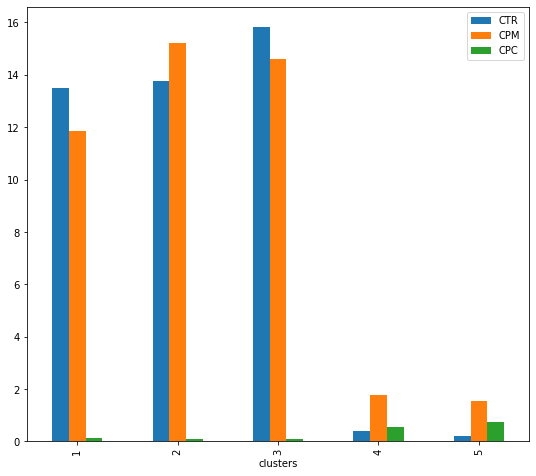

In [ ]:
q.plot(x="clusters", y=["CTR",'CPM','CPC'], kind="bar", figsize=(9, 8))

In [ ]:
df.groupby('clusters').mean()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
clusters,,,,,,,,,,,,,
1,674.518363,332.486884,212101.573977,3.009302e+05,1.603219e+05,1.398654e+05,13193.965163,1196.505681,0.349496,779.437411,13.488182,11.856050,0.112954
2,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,15.215559,0.110390
3,146.863024,556.471952,73492.390201,6.217201e+04,3.864615e+04,2.971179e+04,4106.438759,430.959377,0.349162,283.530730,15.814308,14.614285,0.101779
4,419.310527,148.119219,53766.219351,2.064921e+06,1.014312e+06,9.747896e+05,3466.709000,1745.126111,0.347269,1144.464356,0.387131,1.785053,0.568884
5,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672


In [ ]:
df2=df[df['clusters']==5]
df3=df[df['clusters']==5]

In [ ]:
df2.describe(percentiles=[.10,.25,.50,.75,.80,.85])

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
count,3338.000000,3338.000000,3338.000000,3.338000e+03,3.338000e+03,3.338000e+03,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.0
mean,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672,5.0
std,209.260476,108.634592,20305.598536,6.824631e+06,3.444029e+06,3.300186e+06,5909.729378,5893.376461,0.042461,4750.148312,0.035027,0.307503,0.244624,0.0
min,300.000000,90.000000,65520.000000,3.770909e+06,1.995587e+06,1.855183e+06,2809.000000,2469.020000,0.210000,1604.860000,0.113154,0.851990,0.292810,5.0
10%,300.000000,90.000000,65520.000000,5.137273e+06,3.106902e+06,3.035020e+06,6790.700000,4286.906000,0.230000,2872.231000,0.166195,1.154425,0.480552,5.0
25%,300.000000,90.000000,65520.000000,6.021794e+06,3.458652e+06,3.377550e+06,7830.750000,4767.517500,0.230000,3194.240000,0.189746,1.320623,0.560580,5.0
50%,336.000000,250.000000,75000.000000,8.205848e+06,4.436330e+06,4.319970e+06,9931.500000,5799.840000,0.300000,4059.890000,0.219225,1.515168,0.738168,5.0
75%,728.000000,250.000000,75000.000000,1.808268e+07,9.843283e+06,9.457141e+06,18272.250000,15568.340000,0.330000,11987.622500,0.240950,1.716925,0.867860,5.0
80%,728.000000,250.000000,75000.000000,1.964308e+07,1.051622e+07,1.012611e+07,19474.800000,16466.788000,0.330000,12679.428000,0.245378,1.771551,0.910666,5.0
85%,728.000000,250.000000,75000.000000,2.117874e+07,1.114011e+07,1.074522e+07,20547.100000,17503.467500,0.330000,13477.670500,0.250314,1.852853,0.980557,5.0


In [ ]:
df3.describe(percentiles=[.10,.25,.50,.75,.80,.85,.90])

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
count,3338.000000,3338.000000,3338.000000,3.338000e+03,3.338000e+03,3.338000e+03,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.0
mean,486.291192,193.190533,75234.140204,1.170445e+07,6.337908e+06,6.132361e+06,12534.271120,9673.524311,0.281941,7186.205077,0.213804,1.540024,0.752672,5.0
std,209.260476,108.634592,20305.598536,6.824631e+06,3.444029e+06,3.300186e+06,5909.729378,5893.376461,0.042461,4750.148312,0.035027,0.307503,0.244624,0.0
min,300.000000,90.000000,65520.000000,3.770909e+06,1.995587e+06,1.855183e+06,2809.000000,2469.020000,0.210000,1604.860000,0.113154,0.851990,0.292810,5.0
10%,300.000000,90.000000,65520.000000,5.137273e+06,3.106902e+06,3.035020e+06,6790.700000,4286.906000,0.230000,2872.231000,0.166195,1.154425,0.480552,5.0
25%,300.000000,90.000000,65520.000000,6.021794e+06,3.458652e+06,3.377550e+06,7830.750000,4767.517500,0.230000,3194.240000,0.189746,1.320623,0.560580,5.0
50%,336.000000,250.000000,75000.000000,8.205848e+06,4.436330e+06,4.319970e+06,9931.500000,5799.840000,0.300000,4059.890000,0.219225,1.515168,0.738168,5.0
75%,728.000000,250.000000,75000.000000,1.808268e+07,9.843283e+06,9.457141e+06,18272.250000,15568.340000,0.330000,11987.622500,0.240950,1.716925,0.867860,5.0
80%,728.000000,250.000000,75000.000000,1.964308e+07,1.051622e+07,1.012611e+07,19474.800000,16466.788000,0.330000,12679.428000,0.245378,1.771551,0.910666,5.0
85%,728.000000,250.000000,75000.000000,2.117874e+07,1.114011e+07,1.074522e+07,20547.100000,17503.467500,0.330000,13477.670500,0.250314,1.852853,0.980557,5.0


In [ ]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'clusters'],
      dtype='object')

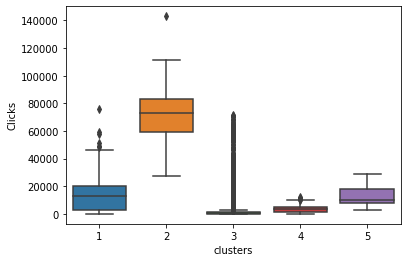

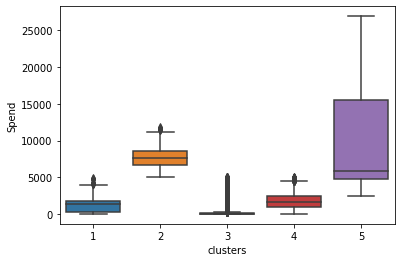

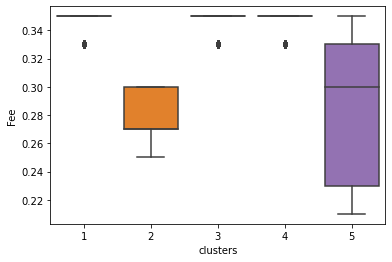

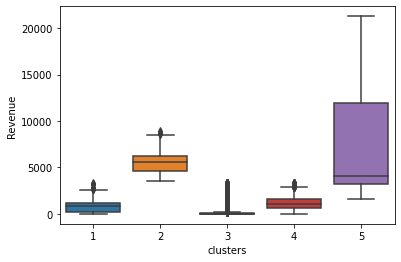

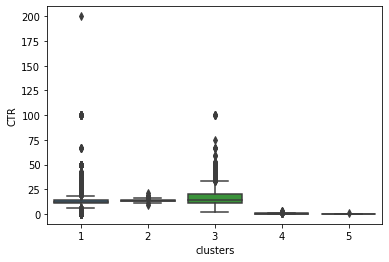

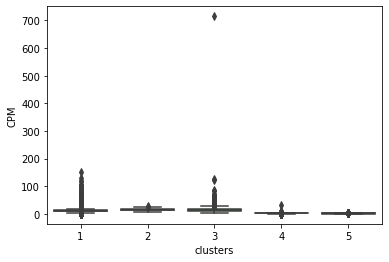

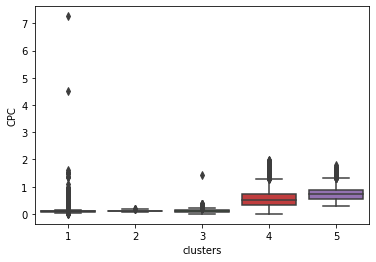

In [ ]:
cols_visualise = ['Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']

for col in cols_visualise:
    sns.boxplot(x = 'clusters', y = col, data = df)
    plt.show()

In [ ]:
wss=[]

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)

In [ ]:
wss


[299857.9999999997,
 185050.3041263554,
 130170.52762608045,
 92547.51769870284,
 58793.284302754095,
 49128.65346558434,
 44024.84954409239,
 39545.811318625376,
 35658.30862193047,
 32174.15592695886]

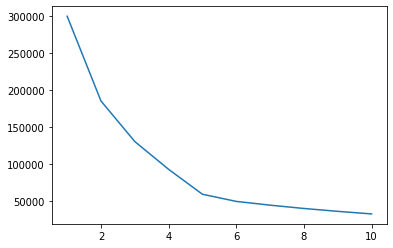

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

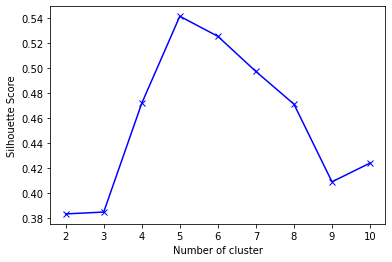

In [ ]:
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num_scaled)
    labels = kmeans.predict(df_num_scaled)
    sc[k] = silhouette_score(df_num_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
sc

{2: 0.38320404510746076,
 3: 0.3846874161187068,
 4: 0.471647290736531,
 5: 0.5412367198148101,
 6: 0.5251926387404259,
 7: 0.49708286026356147,
 8: 0.4709766172130915,
 9: 0.4088746841500217,
 10: 0.42385467788396436}

In [ ]:
pd.DataFrame(list(sc.items()),columns = ['No._of_clusters','Silhouette Score'])

,No._of_clusters,Silhouette Score
0,2,0.383204
1,3,0.384687
2,4,0.471647
3,5,0.541237
4,6,0.525193
5,7,0.497083
6,8,0.470977
7,9,0.408875
8,10,0.423855


In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_num_scaled)
labels = k_means.labels_

In [ ]:
silhouette_score(df_num_scaled,labels)

0.5412389195931974

In [ ]:
x=silhouette_samples(df_num_scaled,labels)<0

In [ ]:
sum(x)

74

In [ ]:
df["Clus_kmeans"] = labels
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,4,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,4,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,4,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,4,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,4,0


In [ ]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'clusters', 'Clus_kmeans'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'clusters', 'Clus_kmeans', 'profit'],
      dtype='object')

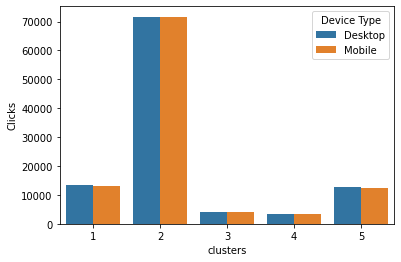

In [ ]:
df1 = df1.groupby(['clusters', 'Device Type']).agg(Clicks=("Clicks", 'mean'))
df1 = df1.reset_index()

# plot barplot
sns.barplot(x="clusters",
           y="Clicks",
           hue="Device Type",
           data=df1)

In [ ]:
df1=df.copy()

In [ ]:
x=df1.groupby(['clusters',])['Revenue','Spend'].aggregate('sum').unstack()
x

<ipython-input-216-33721773ebbf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x=df1.groupby(['clusters',])['Revenue','Spend'].aggregate('sum').unstack()


         clusters
Revenue  1           3.714019e+06
         2           6.932207e+06
         3           1.956079e+06
         4           7.794947e+06
         5           2.398755e+07
Spend    1           5.701350e+06
         2           9.580212e+06
         3           2.973189e+06
         4           1.188605e+07
         5           3.229022e+07
dtype: float64

In [ ]:
df['profit']=df['Revenue']-df['Spend']

In [ ]:
a=df1.groupby(['clusters'])['Device Type'].value_counts()
a.unstack()

Device Type,Desktop,Mobile
clusters,,
1,1715,3050
2,456,797
3,2465,4434
4,2430,4381
5,1194,2144


In [ ]:
df1=df.copy()

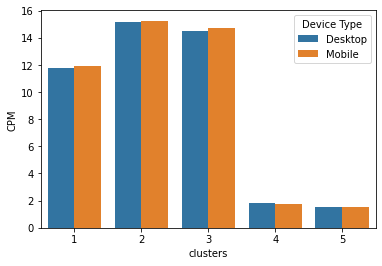

In [ ]:
df1 = df1.groupby(['clusters', 'Device Type']).agg(CPM=("CPM", 'mean'))
df1 = df1.reset_index()

# plot barplot
sns.barplot(x="clusters",
           y="CPM",
           hue="Device Type",
           data=df1)

In [ ]:
df1=df.copy()

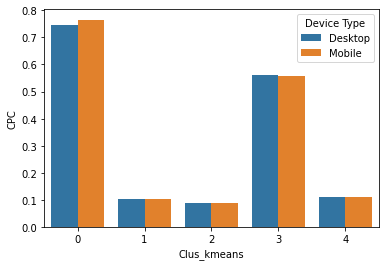

In [ ]:
df1 = df1.groupby(['Clus_kmeans', 'Device Type']).agg(CPC=("CPC", 'mean'))
df1 = df1.reset_index()

# plot barplot
sns.barplot(x="Clus_kmeans",
           y="CPC",
           hue="Device Type",
           data=df1)

In [ ]:
df1=df.copy()

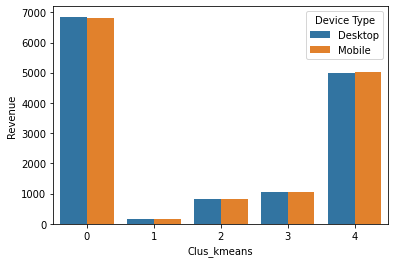

In [ ]:
df1 = df1.groupby(['Clus_kmeans', 'Device Type']).agg(Revenue=("Revenue", 'mean'))
df1 = df1.reset_index()

# plot barplot
sns.barplot(x="Clus_kmeans",
           y="Revenue",
           hue="Device Type",
           data=df1)